In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [7]:
X = df.drop(["quality"], axis = 1).values
y = df["quality"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 21)

knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [8]:
y_pred = knn.predict(X_test)

In [9]:
print(y_pred)

[5 6 6 5 5 6 6 6 5 6 5 5 5 5 5 6 6 5 6 6 6 5 5 5 5 5 5 5 6 7 5 7 5 5 5 5 6
 5 5 5 6 6 5 6 5 6 5 6 5 5 5 7 6 6 5 6 7 5 6 5 6 5 6 5 6 5 5 5 5 5 5 5 5 7
 5 5 6 6 5 6 5 7 5 5 5 5 6 5 5 6 5 5 5 5 5 6 5 6 6 6 6 7 6 6 5 6 6 5 5 6 7
 6 5 5 5 7 5 5 5 6 6 6 6 5 5 5 7 5 5 6 5 5 5 6 6 5 5 7 6 7 5 5 5 5 5 6 5 6
 5 6 6 5 5 6 5 5 5 6 6 7 6 5 6 5 6 5 5 5 5 3 5 6 5 6 6 6 5 5 5 5 7 4 5 5 5
 5 6 5 5 6 5 5 6 5 5 5 5 5 6 5 5 7 5 4 7 5 6 6 6 5 5 5 6 5 6 5 5 5 6 6 5 6
 6 5 5 5 5 5 5 5 4 5 5 7 5 6 6 5 7 7 5 5 5 5 5 4 5 5 7 5 6 6 6 5 6 7 5 5 6
 7 6 6 6 6 5 7 5 6 6 5 5 5 5 5 5 5 5 6 6 5 7 6 6 5 5 6 5 6 5 5 5 6 5 5 5 5
 5 6 6 6 6 7 6 5 5 5 5 6 6 5 5 5 6 4 5 6 6 5 5 6]


In [10]:
knn.score(X_test,y_test)

0.48125

# RandomizedSearchCV

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
params = { 'n_neighbors' : [2,3,4,5,6,7,8,9],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
     }

In [13]:
classifier = RandomizedSearchCV(knn, params, cv = 10, n_jobs = -1)

In [14]:
rcv = classifier.fit(X_train, y_train)

C:\Users\SAI TEJA\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [15]:
rcv.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [16]:
rcv.best_params_

{'weights': 'distance', 'n_neighbors': 8, 'algorithm': 'brute'}

In [17]:
knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
print(y_pred)

[6 6 6 5 6 6 6 5 5 5 6 6 5 5 5 6 6 6 6 6 7 5 5 6 5 5 6 6 6 6 6 7 6 6 5 5 6
 5 5 6 7 6 5 5 5 6 5 6 6 5 5 7 6 6 5 7 6 6 6 5 6 6 6 5 6 5 5 5 5 5 5 6 5 5
 6 5 6 6 7 6 5 5 6 7 7 6 6 5 5 6 5 5 7 5 6 6 5 6 6 6 6 6 6 6 6 6 6 6 5 6 6
 5 5 5 5 7 5 5 5 6 6 5 6 5 5 5 7 5 5 6 5 5 5 5 6 5 5 6 6 7 6 5 5 5 5 6 5 5
 5 6 6 5 5 6 6 5 5 6 6 6 5 6 6 5 7 5 6 5 5 5 6 6 6 6 6 6 5 5 7 5 7 5 6 5 7
 6 6 5 5 6 5 5 6 6 5 6 5 6 6 7 5 7 5 6 6 5 7 5 6 5 5 5 5 5 6 5 5 5 6 6 6 6
 6 6 6 5 5 5 5 6 5 6 5 7 6 6 6 5 5 7 5 6 5 5 5 5 5 6 7 5 5 6 6 5 6 7 6 5 6
 7 6 7 8 5 6 6 6 6 6 6 5 5 5 5 5 5 5 6 6 6 7 6 6 5 5 5 5 6 5 6 5 6 6 6 5 5
 6 6 6 6 6 7 6 6 5 5 6 6 6 5 5 5 6 4 6 7 6 6 6 5]


In [21]:
knn.score(X_test,y_test)

0.65

In [22]:
import matplotlib.pyplot as plt

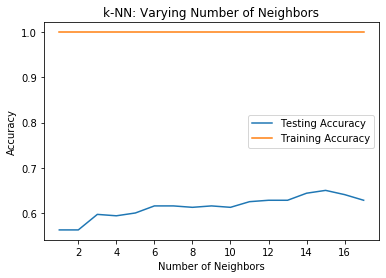

In [23]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 18)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop to assign different values of k
for i, k in enumerate(neighbors):
   
    # k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=k, p=2,
                     weights='distance')

    # Fit the training data
    knn.fit(X_train,y_train)
    
    #Computing accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Computing accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#Draw a plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 



In [57]:
 Xs = scaler.fit_transform(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [133]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size = 0.2, stratify = y, random_state = 21)

In [134]:
from sklearn.model_selection import RandomizedSearchCV

In [135]:
params = { 'n_neighbors' : [2,3,4,5,6,7,8,9],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
     }

In [136]:
classifier = RandomizedSearchCV(knn, params, cv = 10, n_jobs = -1)

In [137]:
rcv = classifier.fit(Xs_train, ys_train)

C:\Users\SAI TEJA\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [138]:
rcv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

In [139]:
rcv.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'ball_tree'}

In [153]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

In [154]:
knn.fit(Xs_train, ys_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

In [155]:
y_pred = knn.predict(Xs_test)

In [156]:
print(y_pred)

[6 5 5 6 5 6 6 5 5 5 6 6 6 5 5 6 6 5 6 6 7 5 5 6 6 6 6 5 6 6 7 7 6 6 7 6 7
 5 5 6 6 6 5 5 6 6 5 5 7 6 5 7 6 6 5 5 6 6 7 6 5 5 6 5 5 5 5 5 5 6 5 6 5 5
 6 5 6 6 7 6 5 6 6 7 7 6 6 6 5 6 5 5 7 5 6 6 5 6 7 6 7 6 6 5 6 5 7 5 6 6 6
 5 5 5 5 7 6 5 5 6 7 5 6 5 5 5 7 5 6 5 5 5 5 5 7 6 5 7 6 7 5 6 6 6 5 6 7 7
 5 6 6 5 5 6 6 5 5 6 6 5 5 6 5 5 7 5 6 6 6 5 5 6 5 6 5 7 6 5 6 5 6 6 6 5 7
 6 5 5 5 6 6 6 6 6 5 6 5 6 6 7 5 7 5 6 6 5 7 5 5 6 6 5 5 6 6 5 6 5 6 6 6 5
 6 6 6 5 5 5 5 6 5 7 5 7 6 6 6 5 5 6 5 6 5 5 6 5 6 6 7 5 5 6 5 6 6 7 5 5 5
 7 5 7 8 5 5 7 5 5 6 6 5 6 5 5 5 5 5 6 6 6 7 6 5 5 5 6 5 6 5 6 5 6 5 5 5 5
 6 6 6 6 6 6 6 5 5 6 6 5 5 5 6 5 5 5 5 7 5 5 6 5]


In [157]:
knn.score(Xs_test,ys_test)

0.7125

In [158]:
import matplotlib.pyplot as plt

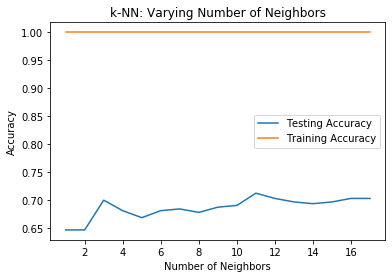

In [159]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 18)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop to assign different values of k
for i, k in enumerate(neighbors):
   
    # k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=k, p=2,
                     weights='distance')

    # Fit the training data
    knn.fit(Xs_train,ys_train)
    
    #Computing accuracy on the training set
    train_accuracy[i] = knn.score(Xs_train, ys_train)

    #Computing accuracy on the testing set
    test_accuracy[i] = knn.score(Xs_test, ys_test)

#Draw a plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()